In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [123]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/clustering_data.csv')

In [124]:
df.head()

,pca_0,pca_1
0,0.203614,0.506445
1,0.333841,0.013796
2,0.333819,0.745865
3,0.203614,0.506445
4,0.203606,0.750468


In [125]:
df.shape

(5665, 2)

In [126]:
df.describe()

,pca_0,pca_1
count,5665.000000,5665.000000
mean,0.477467,0.465735
std,0.310330,0.271543
min,0.000000,0.000000
25%,0.201389,0.253701
50%,0.530869,0.498471
75%,0.730077,0.740365
max,1.000000,1.000000


In [105]:
inits = ['k-means++', 'random']
clusters = range(5,15)
#colors = np.array(["blue", "green", "cyan", "yellow", "orange", "red", "turquoise", "lime", "pink", "purple"])
inertias = []
silhouettes = []

In [106]:
for cluster in clusters:
  for init in inits:
    kmeans = KMeans(n_clusters=cluster, init=init, n_init='auto')
    kmeans.fit(df)

    if init == 'k-means++':
      inertias.append(kmeans.inertia_)
      silhouettes.append(silhouette_score(df, kmeans.labels_))

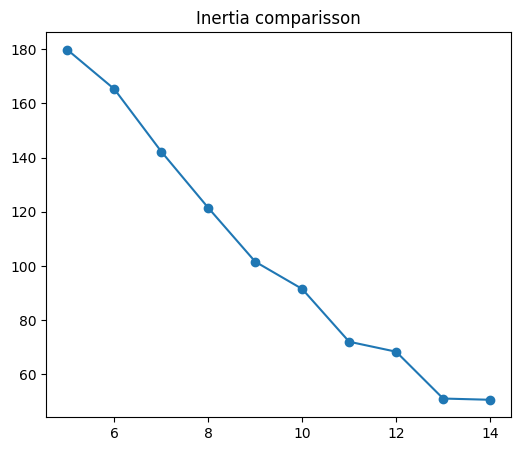

In [107]:
plt.figure(figsize=(6,5))
plt.plot(clusters, inertias, marker='o')
plt.title('Inertia comparisson')
plt.show()

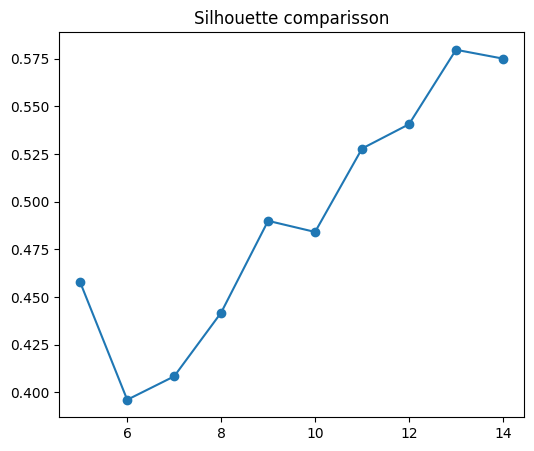

In [108]:
plt.figure(figsize=(6,5))
plt.plot(clusters, silhouettes, marker='o')
plt.title('Silhouette comparisson')
plt.show()

In [115]:
kmeans = KMeans(n_clusters=13, init='k-means++', n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=13, n_init='auto')

In [116]:
import json

def loadColorsFromJSON():
  try:
    with open('/content/drive/MyDrive/Colab Notebooks/IP/Project/colors.json','r') as file:
      colors = json.load(file)
      return colors
  except IOError:
    print('Failed to load resource!')

In [117]:
colors = loadColorsFromJSON()

In [118]:
color_max = len(colors)

In [128]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [129]:
centroids

,0,1
0,0.586847,0.499362
1,0.178194,0.009835
2,0.115224,0.759058
3,0.653459,0.253510
4,0.916129,0.753467
5,0.619900,0.767619
6,0.117108,0.498697
7,0.740656,0.010346
8,0.778491,0.495054
9,0.175008,0.253511


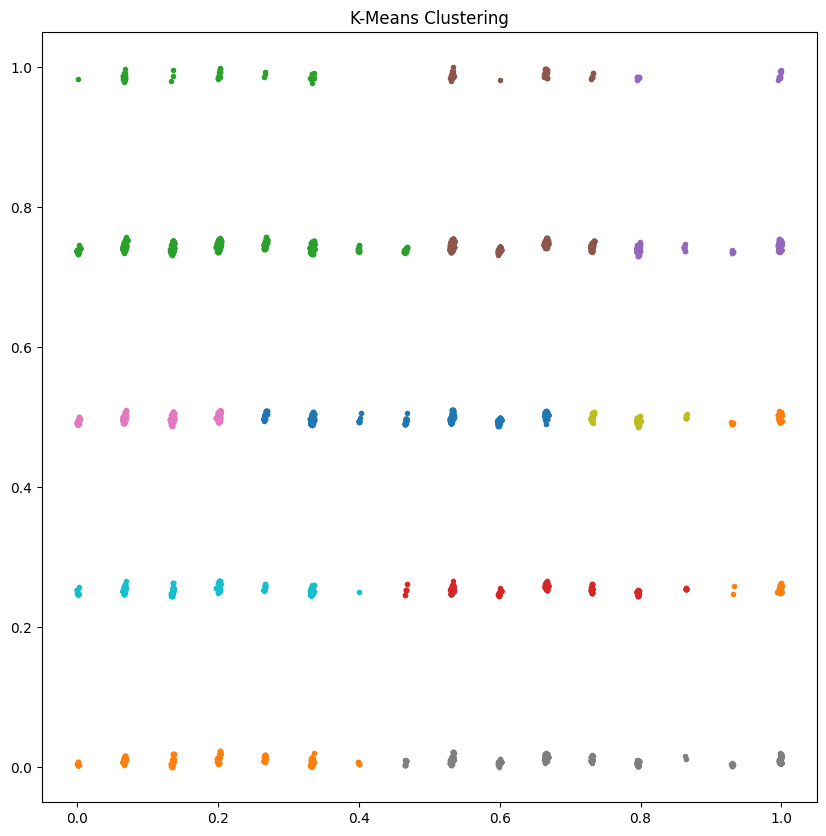

In [136]:
plt.figure(figsize=(10,10))
for cluster_label in range(13):
  cluster = df[kmeans.labels_ == cluster_label]
  plt.scatter(cluster['pca_0'], cluster['pca_1'], marker='.')

#plt.scatter(centroids[0], centroids[1], marker='x', color='black')
plt.title("K-Means Clustering")
plt.show()

In [120]:
import pickle
import os

currDirPath = "./drive/MyDrive/Colab Notebooks/IP/Project/ModelsExport/Clustering"

models = [kmeans]
names = ['KMeans_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)
